## Modeling

#### Import libraries and dataset

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

In [12]:
df = pd.read_csv('../dataset/processed/Telco-Customer-Churn-Processed.csv')

#### Functions for Validation

In [13]:
# Metrics

def calculate_metrics(y_test, y_pred, y_pred_proba, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Metrics for {model_name}:")
    print(f"  Accuracy: {accuracy:.2f}")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1-Score: {f1:.2f}")
    print(f"  AUC-ROC: {auc:.2f}")


In [14]:
# Confusion Matrix

def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [15]:
# ROC Curve

def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})", color='blue')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

#### Models

In [16]:
# Splits the data into train/test
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Metrics for Logistic Regression:
  Accuracy: 0.73
  Precision: 0.49
  Recall: 0.79
  F1-Score: 0.61
  AUC-ROC: 0.83


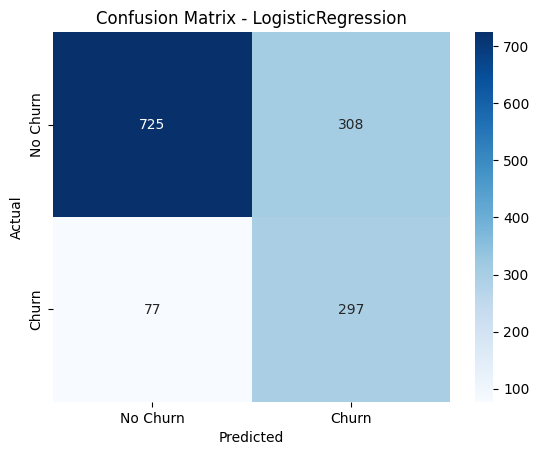

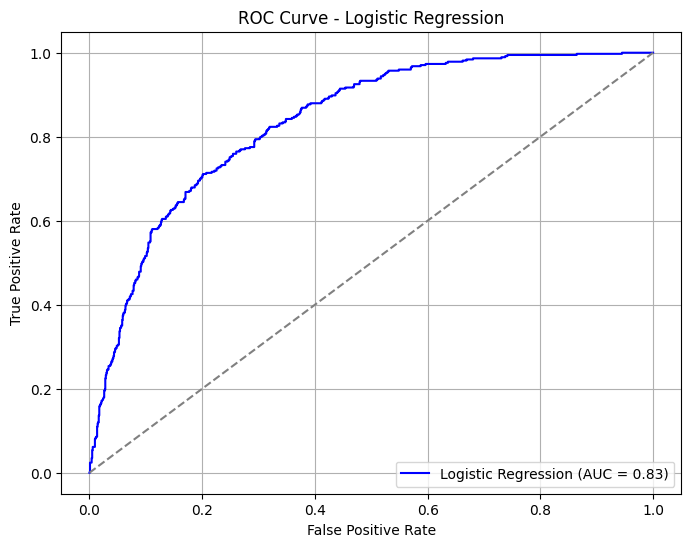

In [17]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

# Class weights to handle imbalance
logreg = LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

calculate_metrics(y_test, y_pred, y_pred_proba, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred, "LogisticRegression")
plot_roc_curve(y_test, y_pred_proba, "Logistic Regression")

Metrics for Random Forest:
  Accuracy: 0.79
  Precision: 0.62
  Recall: 0.50
  F1-Score: 0.55
  AUC-ROC: 0.82


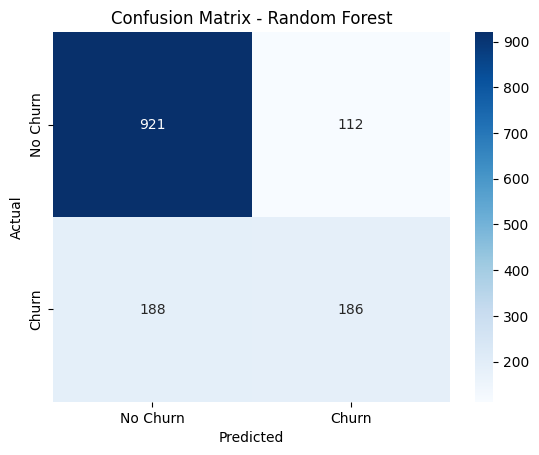

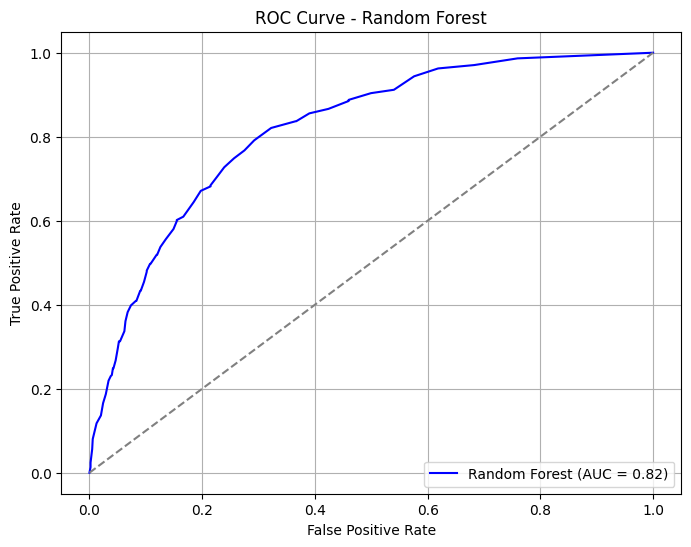

In [18]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=50)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

calculate_metrics(y_test, y_pred_rf, y_pred_proba_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_roc_curve(y_test, y_pred_proba_rf, "Random Forest")

Metrics for CatBoost:
  Accuracy: 0.74
  Precision: 0.51
  Recall: 0.78
  F1-Score: 0.61
  AUC-ROC: 0.83


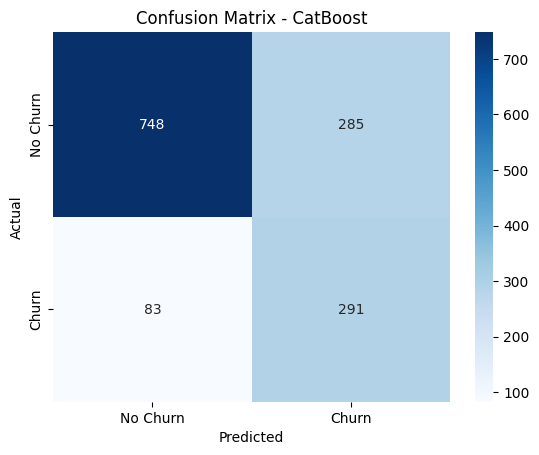

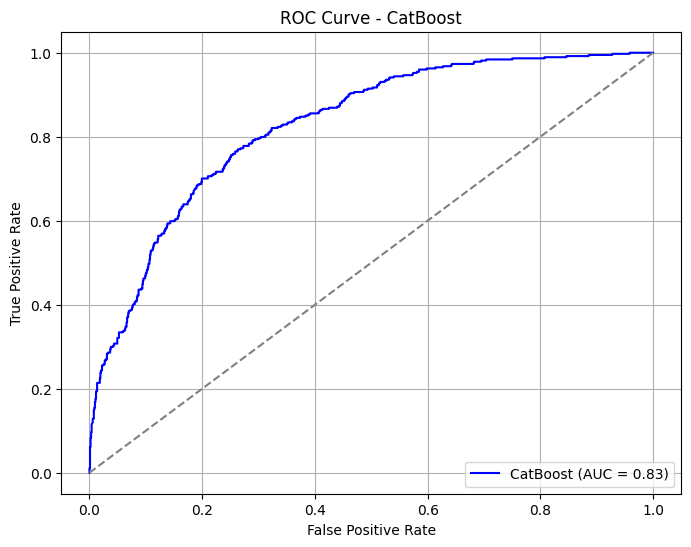

In [19]:
# CatBoost Classifier

from catboost import CatBoostClassifier

# Class Weights
catboost = CatBoostClassifier(random_seed=42, verbose=0, class_weights=[1, 3])
catboost.fit(X_train, y_train)

# Predictions
y_pred_cat = catboost.predict(X_test)
y_pred_proba_cat = catboost.predict_proba(X_test)[:, 1]


calculate_metrics(y_test, y_pred_cat, y_pred_proba_cat, "CatBoost")
plot_confusion_matrix(y_test, y_pred_cat, "CatBoost")
plot_roc_curve(y_test, y_pred_proba_cat, "CatBoost")

#### Grid Search Models

In [ ]:
# Grid search on Logistic Regression

from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(max_iter=1000)

# Defines the parameter grid
param_grid_log_reg = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
}

# Performs Grid Search
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_log_reg.fit(X_train, y_train)

# Prints the best parameters and AUC score
print("Best Parameters for Logistic Regression:", grid_search_log_reg.best_params_)
print("Best AUC-ROC for Logistic Regression:", grid_search_log_reg.best_score_)


c:\Users\Bobathy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
75 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Bobathy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Bobathy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Bobat

Best Parameters for Logistic Regression: {'C': 10, 'penalty': None, 'solver': 'saga'}
Best AUC-ROC for Logistic Regression: 0.8463052790982047


In [ ]:
# Grid search on CatBoost
catboost_model = CatBoostClassifier(verbose=0)

# Defines the parameter grid
param_grid_catboost = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
}

# Performs Grid Search
grid_search_catboost = GridSearchCV(estimator=catboost_model, param_grid=param_grid_catboost, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_catboost.fit(X_train, y_train)

# Prints the best parameters and AUC score
print("Best Parameters for CatBoost:", grid_search_catboost.best_params_)
print("Best AUC-ROC for CatBoost:", grid_search_catboost.best_score_)

Best Parameters for CatBoost: {'depth': 4, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.01}
Best AUC-ROC for CatBoost: 0.8496853919845814


#### CatBoost after Grid Search

Metrics for CatBoost after Grid Search:
  Accuracy: 0.74
  Precision: 0.51
  Recall: 0.80
  F1-Score: 0.62
  AUC-ROC: 0.84


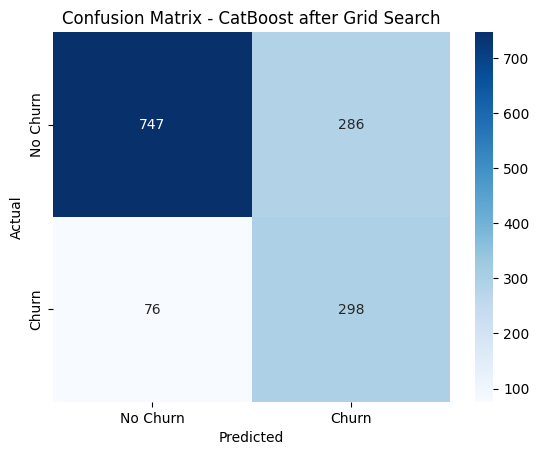

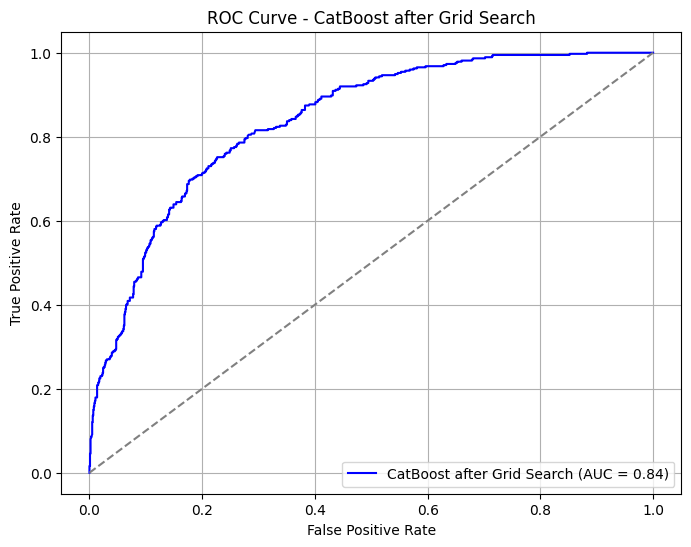

In [23]:
# Best parameters from grid search
best_params_catboost = {
    'depth': 4,
    'iterations': 500,
    'l2_leaf_reg': 3,
    'learning_rate': 0.01
}

# Create the CatBoost model with the best parameters
catboost_model = CatBoostClassifier(
    depth=best_params_catboost['depth'],
    iterations=best_params_catboost['iterations'],
    l2_leaf_reg=best_params_catboost['l2_leaf_reg'],
    learning_rate=best_params_catboost['learning_rate'],
    class_weights=[1, 2.5]
)

# Train the model on the training data
catboost_model.fit(X_train, y_train, verbose=0)

# Make predictions on the test set
y_pred_grid_cat = catboost_model.predict(X_test)
y_pred_proba_grid_cat = catboost_model.predict_proba(X_test)[:, 1]

calculate_metrics(y_test, y_pred_grid_cat, y_pred_proba_grid_cat, "CatBoost after Grid Search")
plot_confusion_matrix(y_test, y_pred_grid_cat, "CatBoost after Grid Search")
plot_roc_curve(y_test, y_pred_proba_grid_cat, "CatBoost after Grid Search")